In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
################
# NON-LINEAR PCA
# (Recommended by Parker during our presentation)
# STEPS: Run each cell individually to produce the PCA plot and get the accuracy score
# Non-linear pca doesn't produce great results (similarly to PCA)
################

In [3]:
#Load all datasets
meta = pd.read_csv("EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv")
gct = pd.read_table("EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutlier.tpm.matrix.gct", header=2, delim_whitespace=True)
tsv = pd.read_csv("EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutliers.counts.matrix.tsv", sep='\t')
controls = pd.read_csv("Retina.3009_ssva_controls.txt",header=None)

In [4]:
#Testing out PCA with significant genes from the paper itself (Supplementary Table 1)
known_genes = ["B3GLCT",
              "BLOC1S1",
               "RP11-644F5.10",
               "CTA-228A9.3",
               "SH2B3",
              "MEPCE",
              "PMS2P1",
               "STAG3L5P-PVRIG2P-PILRB",
              "PILRB",
              "TMEM199",
              "POLDIP2",
              "CFI",
              "PLA2G12A",
              "ANAPC11",
              "SKIV2L",
              "HERPUD1",
              "TOMM70",
              "KCNT2",
              "TMEM229B",
              "PLTP"]

In [5]:
#Filtering out all of the important genes
gct_known = gct[gct["Description"].isin(known_genes)]

In [6]:
#removing metadata and converting into numpy array for implementation
data = gct_known
data = data.T
data.columns=data.iloc[1]
data = data.drop(['NAME','Description'], axis=0)
data = data.reset_index()
data = data.rename(columns = {'index': 'r_id'})

In [7]:
#get mgs levels for each sample for the filtered genes
#data_df = pd.DataFrame(data)
ids = list(gct.columns)
ids.remove('NAME')
ids.remove('Description')
data=pd.merge(data, meta[["r_id","mgs_level"]], how="left", on="r_id")
mgs = data["mgs_level"]

In [8]:
#Getting the features (genes) and the output values (mgs level)
X_feat = data.iloc[:,1:-1].values
y_target = data.iloc[:, -1].values

In [9]:
#Splitting the data into train and test sets using scipy train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X_feat, y_target, test_size = 0.2, random_state=0)

In [10]:
#Mean-centering the train and test data
stndS = StandardScaler()
XTrain = stndS.fit_transform(XTrain)
XTest = stndS.transform(XTest)

In [11]:
#Running KernelPCA using the 'rbf' kernel
kernel_pca = KernelPCA(n_components=2, kernel= "rbf")

XTrain = kernel_pca.fit_transform(XTrain)

XTest = kernel_pca.transform(XTest)

In [12]:
#Creating a logistic regression classifier and fitting it to the training data

classifier = LogisticRegression(random_state=0)
classifier.fit(XTrain,YTrain)

LogisticRegression(random_state=0)

In [13]:
#Returning the predicted classes on the test data
Yprd = classifier.predict(XTest)

In [14]:
#Printing the confusion matrix
confusion = confusion_matrix(YTest, Yprd)
print(confusion)

[[ 0 16  4  0]
 [ 0 29  1  0]
 [ 0 22  2  0]
 [ 0 14  3  0]]


In [15]:
#Getting the accuracy
accuracy_score(YTest, Yprd)

0.34065934065934067

In [16]:
#Variables for graphing
Xset,Yset = XTrain,YTrain

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

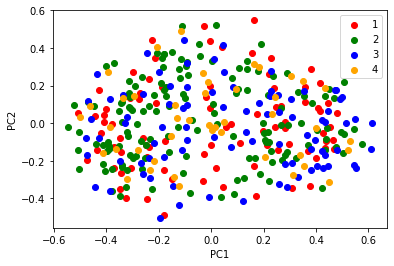

In [17]:
#Plotting the graph using 

for i,j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1],
               c = ListedColormap(('red','green','blue','orange'))(i), label=j)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()